In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from collections import Counter

In [2]:
import os
os.chdir('C:\\Users\\User\\Desktop\\data science projects\\Human Activity Recognition with Smartphones')

In [3]:
pwd

'C:\\Users\\User\\Desktop\\data science projects\\Human Activity Recognition with Smartphones'

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [5]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df_train.shape

(7352, 563)

In [7]:
df_test.shape

(2947, 563)

In [8]:
df_train.isnull().values.any()

False

In [9]:
df_test.isnull().values.any()

False

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [11]:
print('Number of duplicates in train : ',sum(df_train.duplicated()))
print('Number of duplicates in test : ', sum(df_test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


In [12]:
print('Total number of missing values in train : ', df_train.isna().values.sum())
print('Total number of missing values in train : ', df_test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


In [13]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df_train.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [14]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df_test.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [15]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

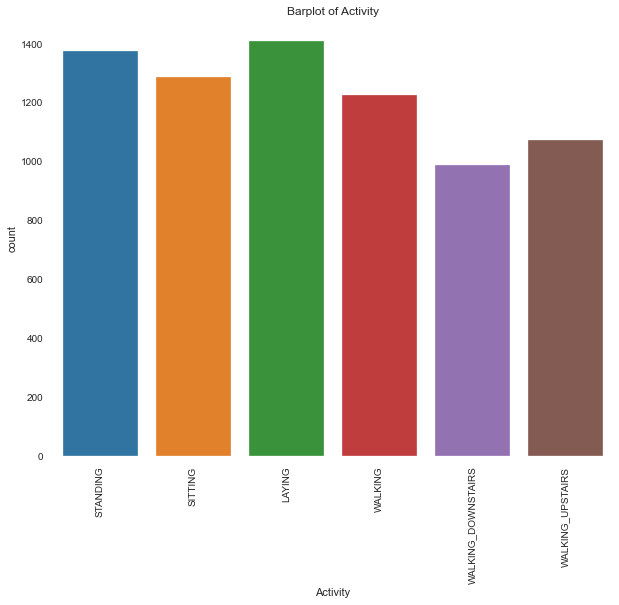

In [16]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(df_train.Activity)
plt.xticks(rotation=90)

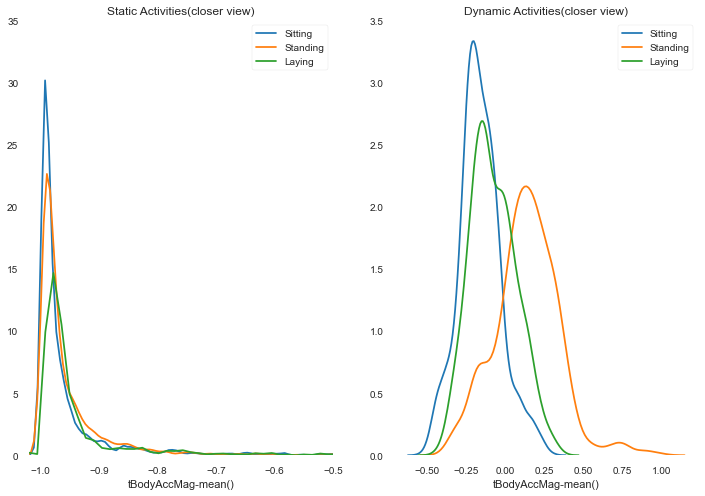

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(df_train[df_train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(df_train[df_train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(df_train[df_train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(df_train[df_train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(df_train[df_train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(df_train[df_train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

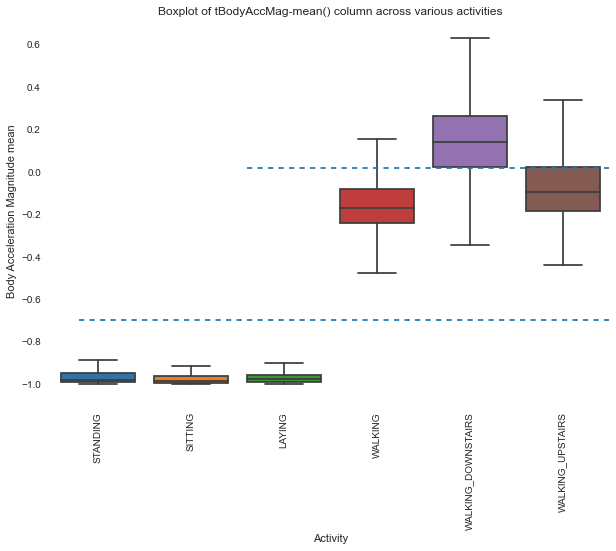

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=df_train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

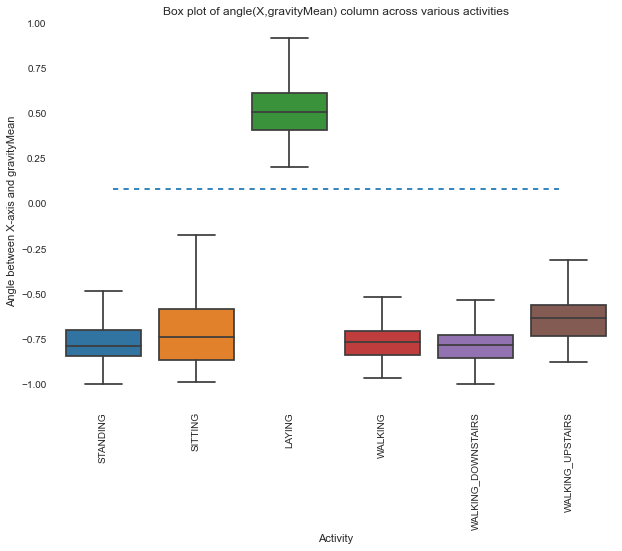

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=df_train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 90)

In [20]:
X_train = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
Y_train_label = df_train.Activity.values.astype(object)
X_test = pd.DataFrame(df_test.drop(['Activity','subject'],axis=1))
Y_test_label = df_test.Activity.values.astype(object)

In [21]:
Y_train_label

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [22]:
Y_test_label

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

from sklearn.svm import SVC
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [26]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.938255432696532 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.0001 



In [27]:
Y_test.shape

(2947,)

In [28]:
Y_pred.shape

(2947,)

In [29]:
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   5 398  17]
 [  0   0   0  16   2 453]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.89      0.93       491
           2       0.91      0.97      0.94       532
           3       0.96      0.99      0.98       496
           4       0.99      0.95      0.97       420
           5       0.96      0.96      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 0.996872
Testing  set score for SVM: 0.961656


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [32]:
X_train.shape

(7352, 561)

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [55]:
X_train=df_train.iloc[:,:-2]
y_train=df_train.iloc[:,-1]

X_test=df_test.iloc[:,:-2]
y_test=df_test.iloc[:,-1]

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [59]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [60]:
explained_variance

array([5.07811723e-01, 6.58068027e-02, 2.80643677e-02, 2.50395275e-02,
       1.88828501e-02, 1.72400642e-02, 1.37101147e-02, 1.19907768e-02,
       9.95859511e-03, 9.65086590e-03, 8.60051649e-03, 8.00280950e-03,
       7.63996369e-03, 6.45328924e-03, 6.32324346e-03, 5.99722090e-03,
       5.86750302e-03, 5.75407392e-03, 5.67921047e-03, 5.27295779e-03,
       5.00362925e-03, 4.88408406e-03, 4.78205784e-03, 4.68562930e-03,
       4.49289260e-03, 4.21027243e-03, 4.17978682e-03, 4.05570369e-03,
       3.88524168e-03, 3.87018044e-03, 3.65958878e-03, 3.54553381e-03,
       3.47942606e-03, 3.37187109e-03, 3.29676999e-03, 3.28215050e-03,
       3.20529478e-03, 2.95614939e-03, 2.86722415e-03, 2.85074548e-03,
       2.68766324e-03, 2.65619859e-03, 2.63405989e-03, 2.58850596e-03,
       2.49054872e-03, 2.46954034e-03, 2.40679913e-03, 2.36115075e-03,
       2.30278857e-03, 2.27567245e-03, 2.20164699e-03, 2.13466984e-03,
       2.07704456e-03, 2.02496620e-03, 1.99779441e-03, 1.97750625e-03,
      

In [61]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

In [62]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
history=model.fit(X_train,y_train,batch_size=256,epochs=22,validation_data=(X_test,y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/22
7352/7352 [==============================] - 1s 181us/sample - loss: 1.5779 - accuracy: 0.5626 - val_loss: 1.0618 - val_accuracy: 0.6390
Epoch 2/22
7352/7352 [==============================] - 0s 31us/sample - loss: 0.5704 - accuracy: 0.8071 - val_loss: 0.2929 - val_accuracy: 0.9460
Epoch 3/22
7352/7352 [==============================] - 0s 35us/sample - loss: 0.1531 - accuracy: 0.9592 - val_loss: 0.1431 - val_accuracy: 0.9508
Epoch 4/22
7352/7352 [==============================] - 0s 32us/sample - loss: 0.0503 - accuracy: 0.9827 - val_loss: 0.1534 - val_accuracy: 0.9481
Epoch 5/22
7352/7352 [==============================] - 0s 33us/sample - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.1701 - val_accuracy: 0.9498
Epoch 6/22
7352/7352 [==============================] - 0s 32us/sample - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.1633 - val_accuracy: 0.9552
Epoch 7/22
7352/7352 [==============================] - 0s 35us/sampl

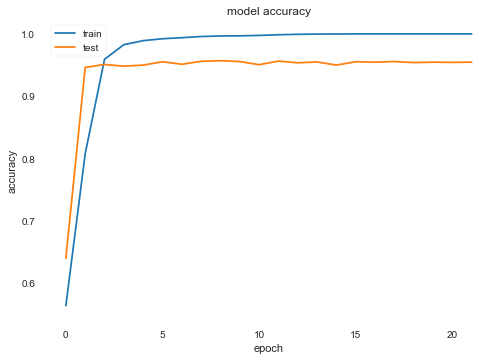

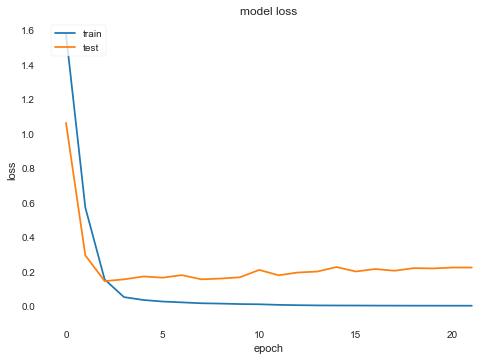

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
y_pred=model.predict(X_test)

In [66]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [67]:
y_test_class

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [68]:
y_pred_class

array([2, 2, 1, ..., 5, 5, 5], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class)

In [70]:
cm

array([[521,   0,  16,   0,   0,   0],
       [  1, 435,  54,   0,   0,   1],
       [  0,  18, 514,   0,   0,   0],
       [  0,   0,   0, 490,   3,   3],
       [  0,   0,   0,   4, 410,   6],
       [  0,   0,   0,  25,   3, 443]], dtype=int64)

In [71]:
accuracy

0.9545300305395318